In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
from island import Island
from geometry import *
from continuum import Continuum

In [2]:
m0=5
n0=2
q0 = m0/n0
qprime = 4
r0 = 0.5
psi0 = r0**2/2
geo = ToroidalGeometry(a=1, R0=3, B0=1)
A = 0.0001
myisland = Island(geo, m0=m0, n0=n0, psi0=psi0, qprime=qprime, A=A)
smallA = 1e-5
smallisland = Island(geo, m0=m0, n0=n0, psi0=psi0, qprime=qprime, A=smallA)
noA = 1e-10
noisland = Island(geo, m0=m0, n0=n0, psi0=psi0, qprime=qprime, A=noA)

In [3]:
#mycont = Continuum(myisland, -50, 101, -11, 12,  mfp=1, nfp=2)
mycont = Continuum(myisland, -50, 51, -11, 12,  mfp=2, nfp=2)
geo = ToroidalGeometry(a=1, R0=3, B0=1)
A = 0.0001
myisland = Island(geo, m0=m0, n0=n0, psi0=psi0, qprime=qprime, A=A)

In [4]:
chilist = np.linspace(0, 1, 201)
psibar, omega = mycont.compute_continuum(chilist, passing=False, sign=1)
omega *= 3**2

0.0
0.005
0.01
0.015
0.02
0.025
0.03
0.035
0.04
0.045
0.05
0.055
0.06
0.065
0.07
0.075
0.08
0.085
0.09
0.095
0.1
0.105
0.11
0.115
0.12
0.125
0.13
0.135
0.14
0.145
0.15
0.155
0.16
0.165
0.17
0.17500000000000002
0.18
0.185
0.19
0.195
0.2
0.20500000000000002
0.21
0.215
0.22
0.225
0.23
0.23500000000000001
0.24
0.245
0.25
0.255
0.26
0.265
0.27
0.275
0.28
0.28500000000000003
0.29
0.295
0.3
0.305
0.31
0.315
0.32
0.325
0.33
0.335
0.34
0.34500000000000003
0.35000000000000003
0.355
0.36
0.365
0.37
0.375
0.38
0.385
0.39
0.395
0.4
0.405
0.41000000000000003
0.41500000000000004
0.42
0.425
0.43
0.435
0.44
0.445
0.45
0.455
0.46
0.465
0.47000000000000003
0.47500000000000003
0.48
0.485
0.49
0.495
0.5
0.505
0.51
0.515
0.52
0.525
0.53
0.535
0.54
0.545
0.55
0.555
0.56
0.5650000000000001
0.5700000000000001
0.5750000000000001
0.58
0.585
0.59
0.595
0.6
0.605
0.61
0.615
0.62
0.625
0.63
0.635
0.64
0.645
0.65
0.655
0.66
0.665
0.67
0.675
0.68
0.685
0.6900000000000001
0.6950000000000001
0.7000000000000001
0.705
0.

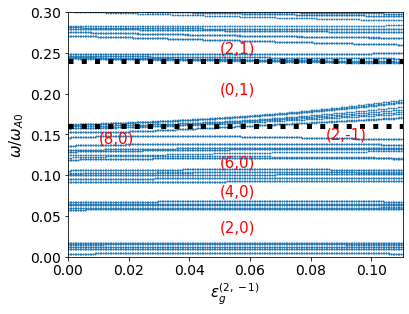

In [19]:
plt.rcParams['figure.figsize'] = [6,4.5]


plt.scatter(np.broadcast_to(chilist[:,None] * 0.11031105375332835, omega.shape), np.sqrt(np.abs(omega)), s=0.5)
xpoints = np.array([0, 0.11031105375332835])
down = [0.16, 0.16]
up = [0.24,0.24]
plt.plot(xpoints, up, 'k:', linewidth=5)
plt.plot(xpoints, down, 'k:', linewidth=5)
#plt.plot(psibar, np.abs( 0* Omegat + 1/5), 'r')

plt.xlim([0,0.11031105375332835])
plt.ylim([0,0.3])
plt.xlabel(r"$\epsilon_g^{(2,-1)}$", fontsize=15)
plt.ylabel(r"$\omega / \omega_{A0}$", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.text(0.05, 0.2, '(0,1)', c='r', fontsize=15)
plt.text(0.05, 0.25, '(2,1)',c='r', fontsize=15)
plt.text(0.085, 0.145, '(2,-1)',c='r', fontsize=15)
plt.text(0.05, 0.075, '(4,0)',c='r', fontsize=15)
plt.text(0.05, 0.03, '(2,0)',c='r', fontsize=15)
plt.text(0.05, 0.11, '(6,0)', c='r', fontsize=15)
plt.text(0.01, 0.14, '(8,0)', c='r', fontsize=15)
plt.savefig('continuum_eps_scan.png',dpi=300, bbox_inches='tight')

In [6]:
zeta = np.linspace(0, 10 * np.pi, 256, endpoint=False)
alphabar = np.linspace(0, 2*np.pi, 128, endpoint=False)

Atest = 0.0001
J, gradchi2, B2 = myisland.get_J_gradchi2_B2(0.99999*Atest, alphabar, zeta, False)

Bfft = np.fft.fft2(np.sqrt(B2.T)) / B2.size
gradchi2fft = np.fft.fft2(gradchi2.T) / B2.size
Jfft = np.fft.fft2(J.T * B2.T) / B2.size
combI = J.T * gradchi2.T / B2.T
combfft = np.fft.fft2(combI) / B2.size

9.9999e-05


In [7]:
print(Bfft[0,2] / Bfft[0,0] + Bfft[0,-2] / Bfft[0,0])
print(Bfft[2,0] / Bfft[0,0]+Bfft[-2,0] / Bfft[0,0])
print(Bfft[2,2] / Bfft[0,0])
print(Bfft[2,-2] / Bfft[0,0])

print('-----')

print(gradchi2fft[0,2] / gradchi2fft[0,0] + gradchi2fft[0,-2] / gradchi2fft[0,0])
print(gradchi2fft[2,0] / gradchi2fft[0,0]+gradchi2fft[-2,0] / gradchi2fft[0,0])
print(gradchi2fft[2,2] / gradchi2fft[0,0]+gradchi2fft[-2,-2] / gradchi2fft[0,0])
print(gradchi2fft[2,-2] / gradchi2fft[0,0] + gradchi2fft[-2,2] / gradchi2fft[0,0])

print('-----')

print(Jfft[0,2] / Jfft[0,0] + Jfft[0,-2] / Jfft[0,0])
print(Jfft[2,0] / Jfft[0,0]+Jfft[-2,0] / Jfft[0,0])
print(Jfft[2,2] / Jfft[0,0])
print(Jfft[2,-2] / Jfft[0,0])

(1.2465948844076297e-05-2.544341682201102e-21j)
(-0.17043714576931246-2.6450821142881505e-18j)
(-0.0005428562435356749+4.1255790027688675e-19j)
(-0.0001562994998911475+1.3892622202417933e-18j)
-----
(0.8818000000000001-6.352747104407253e-19j)
(0.05381156055800192-4.87890977618477e-19j)
(1.1030995064256868e-05-9.687409938629026e-19j)
(-0.0073033354505977355+4.256340559952859e-19j)
-----
(1.222449446489921e-05+1.6118640392532677e-23j)
(0.0005011399176704421-1.1237778901837535e-21j)
(3.850131970150393e-06+4.401768171271697e-19j)
(-4.6034101148849927e-07+8.030923953251001e-21j)
